In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import binom

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('dataset.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Посмотрим в целом на данные и на основные статистики

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Соотношение полов

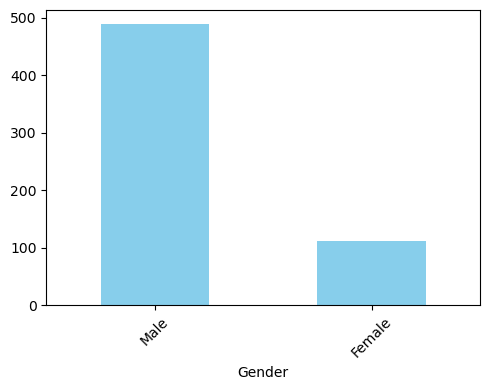

In [4]:
genre_counts = data['Gender'].value_counts()
plt.figure(figsize = (5, 4))  
genre_counts.plot(kind = 'bar', color = 'skyblue')
plt.xticks(rotation = 45)  
plt.tight_layout() 
plt.show()

Почему-то в данном датасете мужчин сильно больше, чем женщин. Возможно это обусловлено происхождением данных (или же их неполнотой и нерепрезентативностью). В источнике было указано, что это - очень маленькая подвыборка. Также дополнительные источники указывают, что и в США, и в России, и, вероятно, везде, есть некоторый половой перекос в кредитах, однако он не является очень значительным:

https://www.cian.ru/novosti-zhenschiny-oformljajut-ipoteku-chasche-no-muzhchiny-berut-kredity-na-bolshie-summy-337384/

https://www.cian.ru/novosti-zhenschiny-oformljajut-ipoteku-chasche-no-muzhchiny-berut-kredity-na-bolshie-summy-337384/

Более того, обычно женщины берут кредиты чуть чаще, чем мужчины, что опять-таки не обнадеживает. Будем держать этот факт в голове.

### Посмотрим на средний процент одобрений у мужчин и женщин

In [5]:
print(data[data['Gender'] == 'Male']['Loan_Status'].value_counts())

Loan_Status
Y    339
N    150
Name: count, dtype: int64


In [6]:
print(data[data['Gender'] == 'Female']['Loan_Status'].value_counts())

Loan_Status
Y    75
N    37
Name: count, dtype: int64


In [7]:
print('У мужчин вероятность получить кредит равна:',339/(150+339))
print('У женщин вероятность получить кредит равна:',75/(75+37))

У мужчин вероятность получить кредит равна: 0.6932515337423313
У женщин вероятность получить кредит равна: 0.6696428571428571


Мужчинам одобряют кредиты на пару процентов чаще, однако, вероятно, это всего лишь погрешность + данных достаточно мало, так что если бы еще пяти женщинам одобрили бы кредит, то разница уже не была бы заметна

### Тем не менее давайте попробуем с точки зрения статистики оценить ситуацию

Всего имеется 500 мужчин и 100 женщин. По набору данных, одобрили кредит 69% мужчин, однако у женщин этот показатель чуть ниже - 67%. Вопрос, правда ли, что от пола зависит выдача кредита?

#### Распределение количества человек, которым выдадут кредит = биномиальное распределение

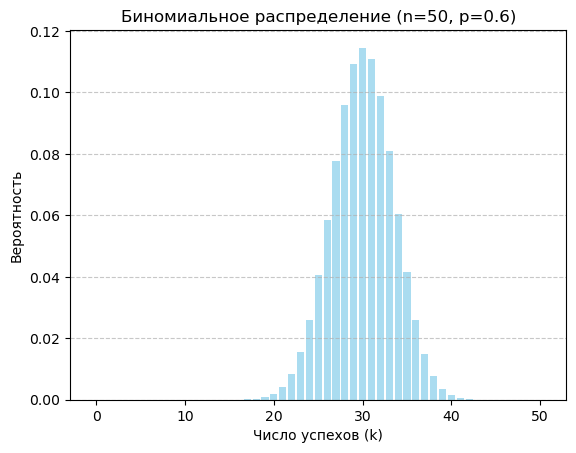

In [8]:
n = 50 
p = 0.6 
k = np.arange(0, n + 1)
probabilities = binom.pmf(k, n, p)
plt.bar(k, probabilities, color='skyblue', alpha=0.7)
plt.title(f'Биномиальное распределение (n={n}, p={p})')
plt.xlabel('Число успехов (k)')
plt.ylabel('Вероятность')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Но с биномиальными распределениями работать неудобно, так как у нас большое число опытов (людей) 

По ЦПТ заменим распределение нормальным и далее будем полагать, что данные распределены нормально.

### Гипотеза 1

Предположим, что у обоих полов вероятность выдачи кредита - 68%.

Тогда в среднем 500 * 0.68 = 340 мужчин получат кредиты
Дисперсия = npq = 500 * 0.68*0.32 = 108.8

Далее напишем нормальную функцию распределения и посчитаем вероятность того, что кредит получат от 340 до 360 мужчин. (среднее + 20, т е посчитаем вероятность небольшого завышения) . Она получилась равной 47.192%

##### Проведем аналогичные действия для женщин. 

Только в их случае n = 100. Среднее = 68, дисперсия = 21.76. 
Посчитаем вероятность, что от 60 до 68 женщин получат кредиты (среднее - 8, т е небольшое занижение). 

Считаем вероятность (не пишу подробности, но ясно, что можно или пользоваться таблицами или просто посчитать приближенное знаечние нужного определенного интеграла), получилось 0.44

##### Полагая, что два данныхх события независимы, посчитаем их произведение:
0.440 * 0.472 = 0.208 - вероятность того, что женщин чуть занизят, а мужчин чуть завысят.

p1 = 0.208

### Гипотеза 2

Предположим, что у женщин вероятность выдачи кредита - 67%, а у мужчин - 69%

Проделываем абсолютно аналогичные действия, но теперь рассматривая не "завышенные" и "заниженные" отрезки интегрирования, а средние (то есть, у мужчин среднее теперь 500*0.69 = 345, значит возьмем отрезок [335, 355], те же 20 человек, но уже по центру, а для женщин - [63,71])

Опустим детали расчетов. 

У меня получилось 0.660 для мужчин и 0.601 для женщин.

p2 = их произвдение

##### Оценка правдоподобия

Теперь оценим, на сколько менее вероятна первая модель 
(очевидно, она будет менее вероятна, ибо во второй мы берем центрально-симметричную окрестность колокола, а в первом - нет): 

p2 - p1 = 0.19

### Вывод: 

Дискриминационная модель на 20% более вероятна, чем равноправная, но, 20% - это не очень вероятный исход, поэтому обвинять компанию в предвзятости скорее не стоит. Вероятно такая небольшая разница обусловлена внешними непредсказуемыми явлениями и от пола выдача кредита зависеть абсолютно никак не должна. 

В нашей модели мы имеем право убрать этот признак, как незначительный, если их будет слишком много (у нас ситуация иная, так что убирать ниего не будем)

## Женатые/ не женатые

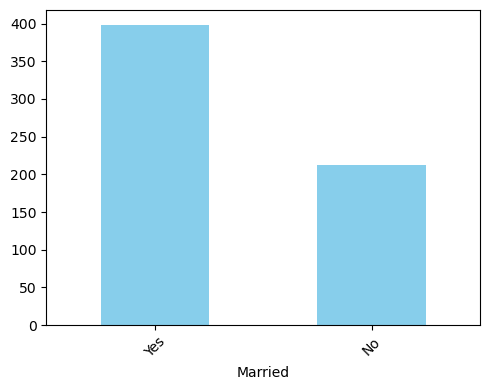

In [9]:
genre_counts = data['Married'].value_counts()
plt.figure(figsize = (5, 4))  
genre_counts.plot(kind = 'bar', color = 'skyblue')
plt.xticks(rotation = 45) 
plt.tight_layout() 
plt.show()

Вот тут данные идеально вписываются в мировую статистику: обычно женатые обращаются в банк за кредитами примерно в 1.5-2 раза чаще, чем неженатые:

https://wealthpursuits.com/money-and-marriage-statistics/

https://chr.plus.rbc.ru/pressrelease/5cecf93e7a8aa97201c17598

### Имеется ли зависимость с целевой переменной?

In [10]:
transir_df1 = data[data['Married'] == 'Yes']['Loan_Status'].value_counts()
print(transir_df1)

Loan_Status
Y    285
N    113
Name: count, dtype: int64


In [11]:
transir_df2 = data[data['Married'] == 'No']['Loan_Status'].value_counts()
print(transir_df2)

Loan_Status
Y    134
N     79
Name: count, dtype: int64


In [12]:
print('Доля одобренных кредитов в женатой группе:',transir_df1[0] / transir_df1.sum())
print('Доля одобренных кредитов в неженатой группе:',transir_df2[0] / transir_df2.sum())

Доля одобренных кредитов в женатой группе: 0.7160804020100503
Доля одобренных кредитов в неженатой группе: 0.6291079812206573


Так что тут явно имеется зависимость между смеменым статусом и одобрением кредита. 

Опять полагаем, что данные распределены нормально по ЦПТ можно найти функции распределения для двух категорий. Работа абсолютно аналогичная, только проще, так как тут не нужно придумывать критерии для того, чтобы понять, есть зависимость или нет, ибо в прошлом случае средние отличались всего на пару процентов, а это уже привело к достаточно серьезным расхождениям в вероятностях наших гипотез.

## Количество детей

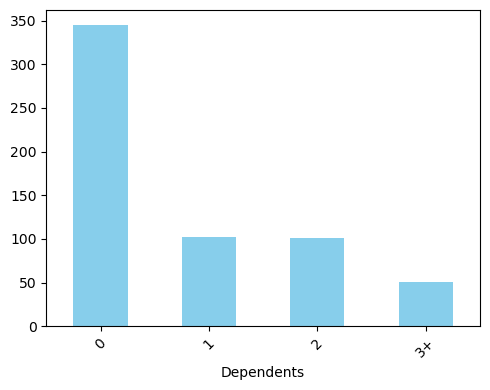

In [13]:
genre_counts = data['Dependents'].value_counts()
plt.figure(figsize = (5, 4))  
genre_counts.plot(kind = 'bar', color = 'skyblue')
plt.xticks(rotation = 45)  
plt.tight_layout() 
plt.show()

In [14]:
genre_counts

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [15]:
print('Среднее число детей на семью:',((genre_counts * [0,1,2,3]).sum())/614*2)

Среднее число детей на семью: 1.488599348534202


Данные показывают, что на семью в среднем приходится примерно 1.5 ребенка. В разных странах этот показатель может достаточно существенно отличаться. Например в США на момент сбора датасета этот показатель составлял 1.8. Используя центральную предельную теорему (150 семей - это вполне неплохих размеров выборка), можно было бы и здесь датасет обвинить в нерепрезентабельности, однако, скорее всего, такое отклонение вызвано особенностями в данных. 

Не сообщается конкретно, какая именно компания предоставила данные, возможно она специализируется на микрофинансовых займах и тогда такой перекос может быть вполне обоснован.

### Имеется ли зависимость с целевой переменной?

In [16]:
print(data[data['Dependents'] == '0']['Loan_Status'].value_counts())

Loan_Status
Y    238
N    107
Name: count, dtype: int64


In [17]:
print(data[data['Dependents'] == '1']['Loan_Status'].value_counts())

Loan_Status
Y    66
N    36
Name: count, dtype: int64


In [18]:
print(data[data['Dependents'] == '2']['Loan_Status'].value_counts())

Loan_Status
Y    76
N    25
Name: count, dtype: int64


In [19]:
print(data[data['Dependents'] == '3+']['Loan_Status'].value_counts())

Loan_Status
Y    33
N    18
Name: count, dtype: int64


In [20]:
# Пардон за такой глупый расчет показателей, было лень обозначать валью за отдельные промежуточные датафреймы
print('Доля одобрений для людей с 0 детьми:',238/(107+238))
print('Доля одобрений для людей с 1 детьми:',66/(66+36))
print('Доля одобрений для людей с 2 детьми:',76/(25+76))
print('Доля одобрений для людей с 3+ детьми:',33/(33+18))

Доля одобрений для людей с 0 детьми: 0.6898550724637681
Доля одобрений для людей с 1 детьми: 0.6470588235294118
Доля одобрений для людей с 2 детьми: 0.7524752475247525
Доля одобрений для людей с 3+ детьми: 0.6470588235294118


Людям без детей или ровно с двумя детьми чаще одобряют кредиты, тут разница между этими категориями существенна, так что зависимость явно есть

## Высшее образование

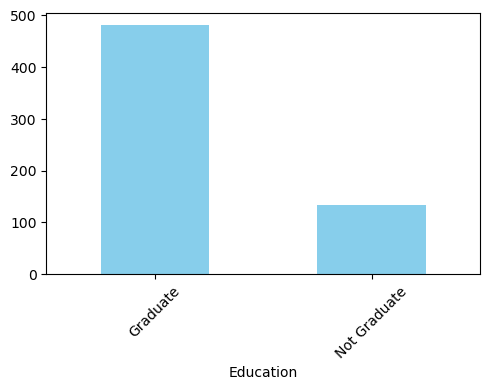

In [21]:
genre_counts = data['Education'].value_counts()
plt.figure(figsize = (5, 4))  
genre_counts.plot(kind = 'bar', color = 'skyblue')
plt.xticks(rotation = 45)  
plt.tight_layout() 
plt.show()

### Связь с количеством детей

In [22]:
print(data[data['Education'] == 'Graduate']['Dependents'].value_counts())
print((275*0+81+77*2+36*3)/(275+81+77+36)) # тут проблема в том, что данные не приведены к типу int, следовало бы это сделать раньше
# но как будто бы сейчас уже проще оставить как есть, ибо пересчитывать данные показатели в планы не входит

Dependents
0     275
1      81
2      77
3+     36
Name: count, dtype: int64
0.7313432835820896


In [23]:
print(data[data['Education'] == 'Not Graduate']['Dependents'].value_counts())
print((70*0+24+21*2+15*3)/(70+24+21+15))

Dependents
0     70
2     24
1     21
3+    15
Name: count, dtype: int64
0.8538461538461538


А кстати вот и возможное объяснение предыдущему показателю: по статистике, люди с высшим образованием реже заводят детей. Однако встает другой вопрос: почему же теперь мы имеем сильный перевес в сторону людей с высшим образованием? 

Вот тут без каких-то дополнительных сведений уже трудновато будет строить гипотезы.

## Соотношение самозанятых

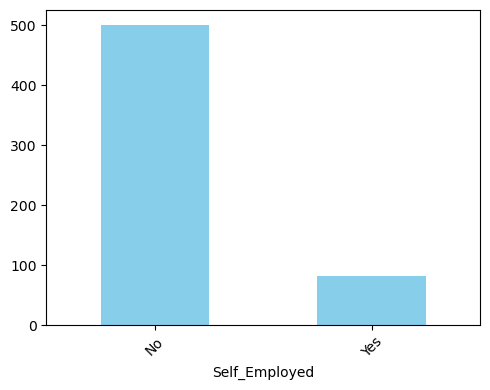

In [24]:
genre_counts = data['Self_Employed'].value_counts()
plt.figure(figsize = (5, 4))  
genre_counts.plot(kind = 'bar', color = 'skyblue')
plt.xticks(rotation = 45)  
plt.tight_layout() 
plt.show()

В данном пункте никаких существенных выводов сделать нельзя, ибо разные в некоторых банках могут отсутствовать хорошие ставки для самозанятых, или же такой вид деятельности может быть просто не распространен в том месте, где собирались данные.

### Зависимости с целевой переменной явно нет

In [25]:
print(data[data['Self_Employed'] == 'No']['Loan_Status'].value_counts())
print(343/(343+157))

Loan_Status
Y    343
N    157
Name: count, dtype: int64
0.686


In [26]:
print(data[data['Self_Employed'] == 'Yes']['Loan_Status'].value_counts())
print(56/(56+26))

Loan_Status
Y    56
N    26
Name: count, dtype: int64
0.6829268292682927


## Доход заемщика. Доход супруга

5403.459283387622
6109.041673387174


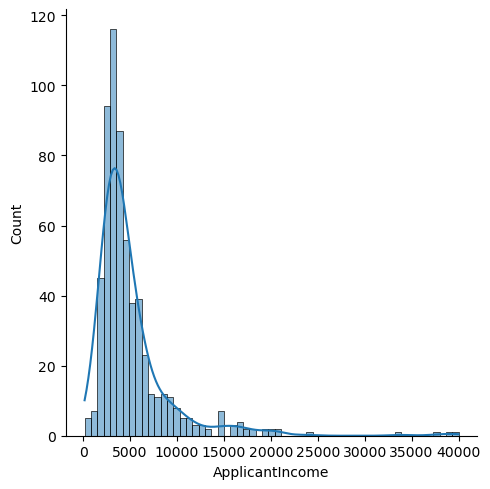

In [27]:
data_ = data[data['ApplicantIncome'] < 40000]

sns.displot(data_['ApplicantIncome'],kde = True)
print(data['ApplicantIncome'].mean())
print((data['ApplicantIncome'].var()) ** 0.5)

1621.2457980271008
2926.2483692241917


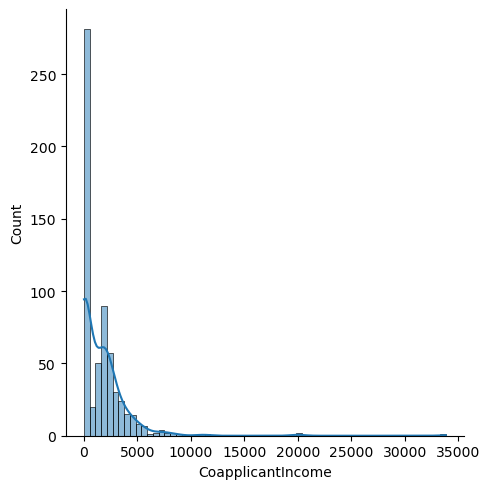

In [28]:
data_ = data[data['CoapplicantIncome'] < 40000]

sns.displot(data_['CoapplicantIncome'],kde = True)
print(data['CoapplicantIncome'].mean())
print((data['CoapplicantIncome'].var()) ** 0.5)

1621.2457980271008
2926.2483692241917
209
0.418


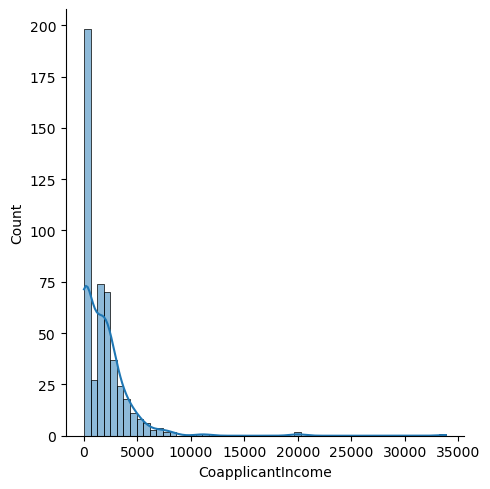

In [29]:
data_ = data[data['CoapplicantIncome'] < 40000]
data_ = data_[data_['Gender']=='Male']
sns.displot(data_['CoapplicantIncome'],kde = True)
print(data['CoapplicantIncome'].mean())
print((data['CoapplicantIncome'].var()) ** 0.5)
print(len(data_[data_['CoapplicantIncome'] < 1000]))
print(209/500)

1621.2457980271008
2926.2483692241917
79
0.7181818181818181


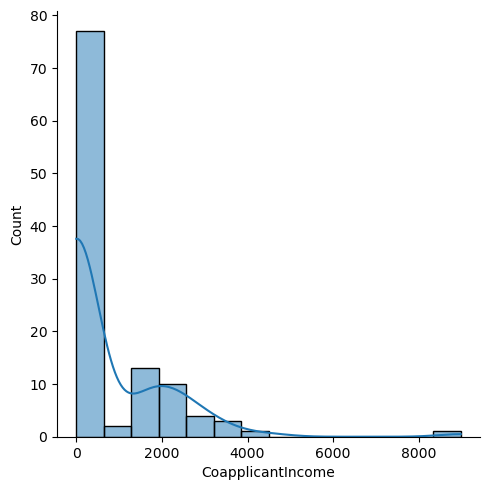

In [30]:
data_ = data[data['CoapplicantIncome'] < 40000]
data_ = data_[data_['Gender']=='Female']
sns.displot(data_['CoapplicantIncome'],kde = True)
print(data['CoapplicantIncome'].mean())
print((data['CoapplicantIncome'].var()) ** 0.5)
print(len(data_[data_['CoapplicantIncome'] < 1000]))
print(79/110)

Статистика крайне занимательная, и при этом грустная. У многих заемщиков супруг много не зарабатывает, при этом сами они в среднем зарабатывают сильно больше. Можно было бы ненароком подумать, что раз мужчин больше, то такая статистика обусловлена тем, что муж работает, а жена сидит дома, но как бы не так! 

Женщин в выборке меньше, при этом у них наиболее бедные супруги: 70% женщин имеют мужа, который зарабатывает меньше 1000 (вероятно все же долларов), при этом у мужчин аналогичный показатель всего 40%. При этом всем заработная плата у женщин в среднем на 1000 меньше, чем у мужчин (согласно данному датасету), что делает ситуацию еще более удручающей и формирует весьма грустный портрет типичного заемщика

## Сумма займа

146.41216216216216
85.58732523570545


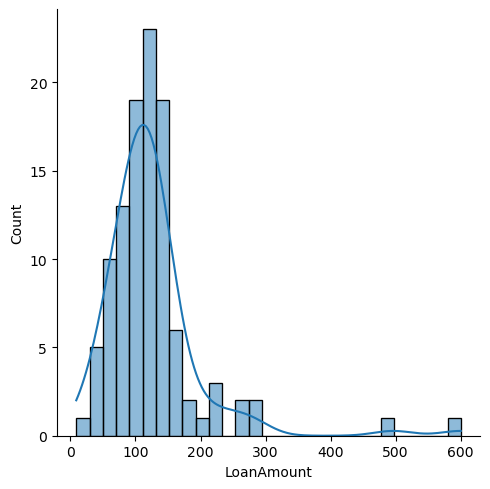

In [31]:
sns.displot(data_['LoanAmount'],kde = True)
print(data['LoanAmount'].mean())
print((data['LoanAmount'].var()) ** 0.5)

Да, это дейтвительно микрозаймы, предположения подтвердились. 

При желании, кстати, можно было бы найти параметры распределения по методу максимального правдоподобия, но тут я полагаю дальше мы их нигде не сможем использовать. Нам скорее интересно посмотреть на общую картину, а выяснение функции распределения явно не принесет чего-то крайе полезного

## Срок займа

342.0
65.12040985461256


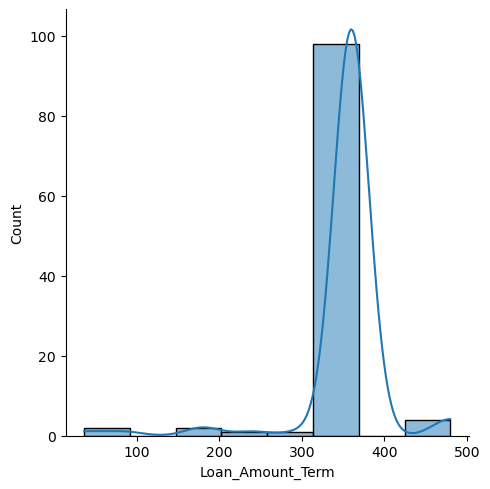

In [32]:
sns.displot(data_['Loan_Amount_Term'],kde = True)
print(data['Loan_Amount_Term'].mean())
print((data['Loan_Amount_Term'].var()) ** 0.5)

В основном микрозаймы одобряют на год

## Есть ли кредитная история в банке

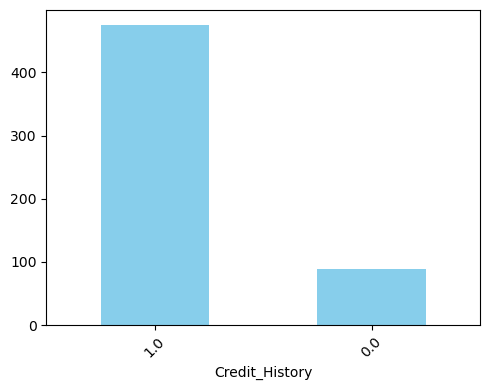

In [33]:
genre_counts = data['Credit_History'].value_counts()
plt.figure(figsize = (5, 4))  
genre_counts.plot(kind = 'bar', color = 'skyblue')
plt.xticks(rotation = 45)  
plt.tight_layout() 
plt.show()

In [34]:
print('Доля клиентов с кредитной историей:',genre_counts[1]/(genre_counts[1]+genre_counts[0]))

Доля клиентов с кредитной историей: 0.8421985815602837


## ВНИМАНИЕ! Очень сильная зависимость с целевой переменной

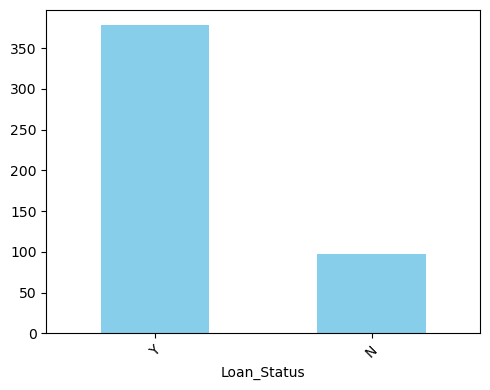

Доля одобрений людям, у которых есть кредитная история: 0.7957894736842105


In [35]:
genre_counts = data[data['Credit_History'] == 1.0]['Loan_Status'].value_counts()
plt.figure(figsize = (5, 4))  
genre_counts.plot(kind = 'bar', color = 'skyblue')
plt.xticks(rotation = 45)  
plt.tight_layout() 
plt.show()
print('Доля одобрений людям, у которых есть кредитная история:',genre_counts[0]/(genre_counts[1]+genre_counts[0]))

### Можно сделать вот такой вывод:

Если тупо одобрять кредиты всем тем, у кого уже есть кредитная история, то мы получим 0.8 * 0.84 = 0.672 вероятность того, что кредит вернут. 

### ЭТО - НАШ БЕЙЗЛАЙН

Если в дальнейшем мы обучим модель, у которой процент возвратов будет чуть ниже 0.7, то это будет означать, что модель просто нагло пользуется мощным признаком и на остальные не обращает почти никакого внимания

## Место проживания

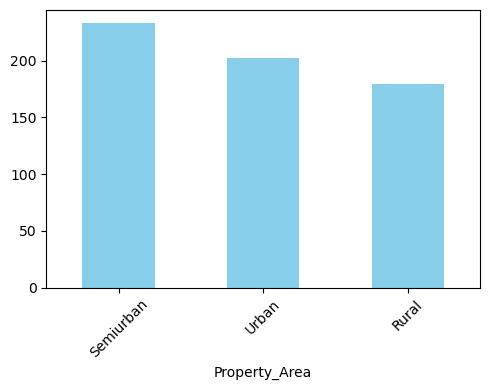

In [36]:
genre_counts = data['Property_Area'].value_counts()
plt.figure(figsize = (5, 4))  
genre_counts.plot(kind = 'bar', color = 'skyblue')
plt.xticks(rotation = 45)  
plt.tight_layout() 
plt.show()

### Зависимость с одобрением кредита

In [37]:
print(data[data['Property_Area'] == 'Semiurban']['Loan_Status'].value_counts())

Loan_Status
Y    179
N     54
Name: count, dtype: int64


In [38]:
print(data[data['Property_Area'] == 'Urban']['Loan_Status'].value_counts())

Loan_Status
Y    133
N     69
Name: count, dtype: int64


In [39]:
print(data[data['Property_Area'] == 'Rural']['Loan_Status'].value_counts())

Loan_Status
Y    110
N     69
Name: count, dtype: int64


Города, поселки и деревни имеют на удивление равномерное распределение, причем у полугородской местности неибольшая зависимость с целевой переменной. В этой местоности живут люди, которым банк чаще одобряет кредит

## Сколько кредитов одобряют

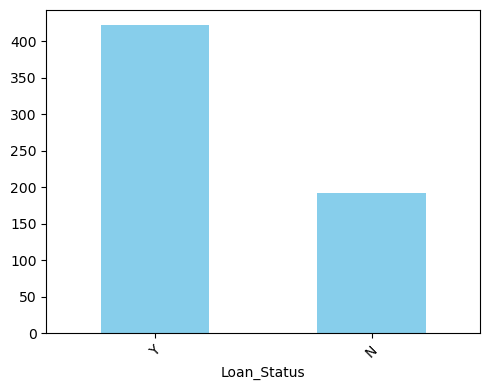

In [40]:
genre_counts = data['Loan_Status'].value_counts()
plt.figure(figsize = (5, 4))  
genre_counts.plot(kind = 'bar', color = 'skyblue')
plt.xticks(rotation = 45)  
plt.tight_layout() 
plt.show()

In [41]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


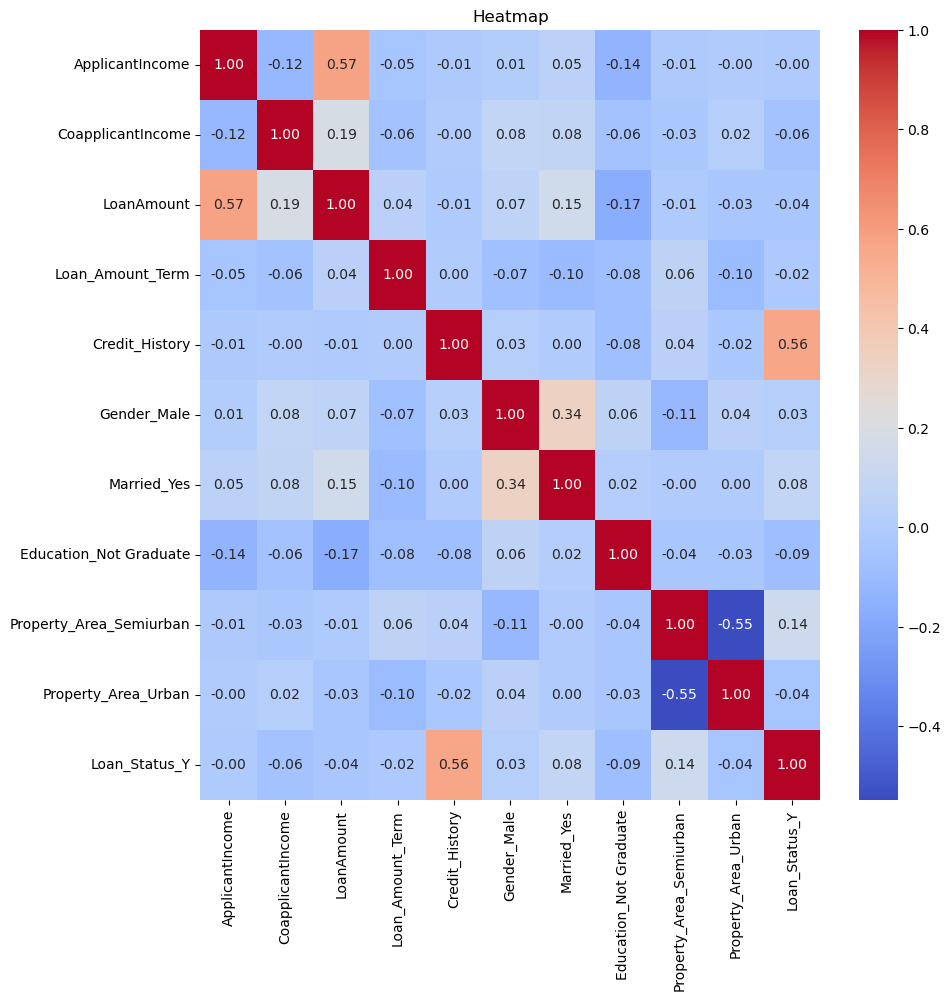

In [42]:
data_ = pd.get_dummies(data, columns=['Gender', 'Married','Education','Property_Area','Loan_Status'], drop_first = True)
plt.figure(figsize=(10, 10))
sns.heatmap(data_.corr(numeric_only =True), cmap='coolwarm',annot=True, fmt=".2f")
plt.title('Heatmap')
plt.show()

Имеется явная линейная зависимость между зарплатой и одобренной суммой, в целом все логично, в остальном как будто бы зависимости не очень сильные (но, например, семейный статус и образование влияют на целевую переменную) 

Можно было бы долго вглядываться в таблицу и узнать, например, что зарплата и образование неплохо коррелируют. Или, например, что сумма займа с образовнаием связана так же. Но, полагаю, что мы уже достаточно посмотрели на данные и на зависимости.

Давайте взглянем на то, как ml справится с поиском зависимостей